### Decision Trees
    Decision Trees consists of root node, decision nodes(middle level nodes that performs decision at each level) and the leaf node(gives the final prediction)
    
    At each node, we split the training examples based on a feature. Each split will lead to branches and each branch will have the examples that are splitted based on the feature value. Each split will have a left branch or left split, right branch or right split
    
    Eg: Given a training set of 10 examples of cat and not cat(binary classification problem), 
    
    Step1: How to choose which feature to split on at a node?
            
            Choose the feature that maximizes the purity
            
            What is purity?
            Purity is when all or most of the examples at a node belongs to single class
            
     Step 2: How to quanitify purity?
         
         Entropy as measure of impurity. It tells us how impure the node is by splitting with particular feature
         
             Entropy(leftsplit) = H(p_left) = - p(c1) log p(c1) - (1-p(c1)) log (1-p(c1))
                                           = - p1 log p1 - p2 log p2
                            
                  Here p1 = p(c1), p2 = 1 - p(c1)
                  where p(c1) is the probability of samples belonging to the class cat i.e (c=1) at a split branch
                    p1 = no. of examples belonging to c1 at a split branch / total no of examples at that split branch
                    p2 = no. of examples not belonging to c1 at the split branch / total no of examples at that split branch
             
             Likewise right split H(p_right) = = - p1 log p1 - p2 log p2 
                  
      But, no. of examples also matter at each split when calculating impurity. Hence we take the weighted entropy i.e multiplying with the fraction of no. of examples at that split branch / total examples.
      
                    Weighted entropy = (no of examples at that split/total training example ) * entropy
                    
                Let this w_left for left split branch and w_right for right split branch
                    
         Total entropy of a feature split = w_left(H(p_left)) + w_right(H(p_right))
         
         We have to find how much entropy is reduced when split with particular feature.
         
          Hence we calculate the difference of top node entropy with feature split entropy to get the "reduction in entropy".
          
          This is also called Information Gain
          
          Information gain = H(p_node) - [w_left(H(p_left)) + w_right(H(p_right))]
          
          Choose the feature with highest information gain i.e highest reduction in entropy. Entropy ranges from 0 to 1. non convex graph i.e concave graph , plot is between p and entropy 
          (opposite of gradient descent graph)
          
          Entropy is high i.e 1 when p is 0.5, entropy is 0 when p is either 0 or 1 (p = 0 or 1 implies pure class)
          
          High entropy means highly impure => we need to choose the feature with lowest entropy
          
          This is for classification scenario and the same can be expaned to regression as well. We call them regression trees.
          
          Regression Trees uses variance to qunatify the purity i.e calculates the reduction in variance at each split
      
    Encoding of features:
    -------------------
    Categorical features - one hot encoding
    Numerical features - sorting all the traininexamples and splitting at all the mid points and calulate the info gain for all the mid splits. Choose one that has the highest info gain
    
    Tree Pruning criteria(when to stop splitting)
    --------------------------------------------
    When there 100 class at a node
    When the depth(levels of splitting) is greater than specified threshold depth
    When the reduction in entropy is less than the thresold
    When the no.of examples at a node is less than the threshold
    
    When to use decision tree? when you have tabular structured data(be it classification or regression)
    Use Neural networks for unstructured data like text, image, audio

### Practice Lab
    In this exercise, you will implement a decision tree from scratch and apply it to the task of classifying whether a mushroom is edible or poisonous.

In [120]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

#### 2 - Problem Statement
    Suppose you are starting a company that grows and sells wild mushrooms.

    Since not all mushrooms are edible, you'd like to be able to tell whether a given mushroom is edible or poisonous based on it's physical attributes
    
    You have some existing data that you can use for this task.
    
    Can you use the data to help you identify which mushrooms can be sold safely?

    Note: The dataset used is for illustrative purposes only. It is not meant to be a guide on identifying edible mushrooms.
    
#### 3 - Dataset
    You will start by loading the dataset for this task. The dataset you have collected is as follows:
        You have 10 examples of mushrooms. For each example, you have
                    Three features
                            Cap Color (Brown or Red),
                            Stalk Shape (Tapering (as in \/) or Enlarging (as in /\)), and
                            Solitary (Yes or No)
                    Label
                            Edible (1 indicating yes or 0 indicating poisonous)
                            
#### 3.1 One hot encoded dataset
    For ease of implementation, we have one-hot encoded the features (turned them into 0 or 1 valued features) 
    
    Therefore,

        X_train contains three features for each example

                Brown Color (A value of 1 indicates "Brown" cap color and 0 indicates "Red" cap color)
                Tapering Shape (A value of 1 indicates "Tapering Stalk Shape" and 0 indicates "Enlarging" stalk shape)
                Solitary (A value of 1 indicates "Yes" and 0 indicates "No")
        
        y_train is whether the mushroom is edible

                y = 1 indicates edible
                y = 0 indicates poisonous

In [121]:
#generating data
X_train = np.array([[1, 1, 1], [1, 0, 1], [1, 0, 0], [1, 0, 0], [1, 1, 1], [0, 1, 1], [0, 0, 0], [1, 0, 1], [0, 1, 0], [1, 0, 0]])
y_train = np.array([1, 1, 0, 0, 1, 0, 0, 1, 1, 0])

In [122]:
print(X_train.shape)
print(y_train.shape)

(10, 3)
(10,)


#### 4 - Decision Tree Refresher
    In this practice lab, you will build a decision tree based on the dataset provided.

    Recall that the steps for building a decision tree are as follows: note this is a recursive function

        - Start with all examples at the root node
        - Calculate information gain for splitting on all possible features, and pick the one with the highest information gain
        - Split dataset according to the selected feature, and create left and right branches of the tree
        - Keep repeating splitting process until stopping criteria is met
     
     In this lab, you'll implement the following functions, which will let you split a node into left and right branches using the feature with the highest information gain

            Calculate the entropy at a node
            Split the dataset at a node into left and right branches based on a given feature
            Calculate the information gain from splitting on a given feature
            Choose the feature that maximizes information gain
        
     We'll then use the helper functions you've implemented to build a decision tree by repeating the splitting process until the stopping criteria is met

        For this lab, the stopping criteria we've chosen is setting a maximum depth of 2

#### 4.1 Calculate entropy
    First, you'll write a helper function called compute_entropy that computes the entropy (measure of impurity) at a node.

    The function takes in a numpy array (y) that indicates whether the examples in that node are edible (1) or poisonous(0)
    
    Complete the compute_entropy() function below to:

        Compute p1, which is the fraction of examples that are edible (i.e. have value = 1 in y) p1 = examples with class 1 / total examples at that split
    
        The entropy is then calculated as for each split branch(left split or right split) is
    
                            H(p1) =  -p1 log(p1) - (1 - p1) log(1-p1)
    
    Note
    The log is calculated with base 2
    For implementation purposes, 0log0 = 0. That is, if p_1 = 0 or p_1 = 1, set the entropy to 0
    Make sure to check that the data at a node is not empty (i.e. len(y) != 0). Return 0 if it is

#### Exercise 1
    Please complete the compute_entropy() function using the previous instructions.

    If you get stuck, you can check out the hints presented after the cell below to help you with the implementation.

In [20]:
def compute_entropy(y):
    """
    Computes the entropy for 
    
    Args:
       y (ndarray): Numpy array indicating whether each example at a node is
           edible (`1`) or poisonous (`0`)
       
    Returns:
        entropy (float): Entropy at that node
        
    """
    entropy = 0
    total_examples_node = len(y)
    if total_examples_node > 0:
        count_c1 = len(np.where(y==1)[0])
        p1 = count_c1 / len(y)
        p2 = 1 - p1
#         entropy = 0 if p1 in [0, 1] else  - (p1 * np.log2(p1)) - (p2 * np.log2(p2)) 
        if p1 not in [0, 1]:
            entropy = - (p1 * np.log2(p1)) - (p2 * np.log2(p2))
    return entropy

In [21]:
# Compute entropy at the root node (i.e. with all examples)
# Since we have 5 edible and 5 non-edible mushrooms, the entropy should be 1"
print("Entropy at root node: ", compute_entropy(y_train))

Entropy at root node:  1.0


#### 4.2 Split dataset
    Next, you'll write a helper function called split_dataset that takes in the data at a node and a feature to split on and splits it into left and right branches. Later in the lab, you'll implement code to calculate how good the split is.

    The function takes in the training data, the list of indices of data points at that node, along with the feature to split on.
    It splits the data and returns the subset of indices at the left and the right branch.
    
    For example, say we're starting at the root node (so node_indices = [0,1,2,3,4,5,6,7,8,9]), and we chose to split on feature 0, which is whether or not the example has a brown cap.
    
    The output of the function is then, left_indices = [0,1,2,3,4,7,9] (data points with brown cap) and right_indices = [5,6,8] (data points without a brown cap)
    
#### Exercise 2
    Please complete the split_dataset() function shown below

        For each index in node_indices
        If the value of X at that index for that feature is 1, add the index to left_indices
        If the value of X at that index for that feature is 0, add the index to right_indices
        If you get stuck, you can check out the hints presented after the cell below to help you with the implementation.

In [123]:
def split_dataset(X, node_indices, feature_idx):
    """
    Splits the data at the given node into
    left and right branches
    
    Args:
        X (ndarray):             Data matrix of shape(n_samples, n_features)
        node_indices (list):     List containing the active indices. I.e, the samples being considered at this step.
        feature_idx (int):       Index of feature to split on
    
    Returns:
        left_indices (list):     Indices with feature value == 1
        right_indices (list):    Indices with feature value == 0
    """
    left_indices = []
    right_indices = []
    for i in node_indices:
        if X[i, feature_idx] == 1:
            left_indices.append(i)
        else:
            right_indices.append(i)
    return left_indices, right_indices

    Now, let's check your implementation using the code blocks below. Let's try splitting the dataset at the root node, which contains all examples at feature 0 (Brown Cap) as we'd discussed above. We've also provided a helper function to visualize the output of the split.

In [124]:
# Case 1
root_node_indices = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

# Feel free to play around with these variables
# The dataset only has three features, so this value can be 0 (Brown Cap), 1 (Tapering Stalk Shape) or 2 (Solitary)
feature_idx = 0
left_indices, right_indices = split_dataset(X_train, root_node_indices, feature_idx)
print("CASE 1:")
print("Left indices: ", left_indices)
print("Right indices: ", right_indices)

CASE 1:
Left indices:  [0, 1, 2, 3, 4, 7, 9]
Right indices:  [5, 6, 8]


[('0', '1'), ('0', '2')]
{'0': (63.0, 90.0), '1': (27.0, 18.0), '2': (99.0, 18.0)}
node 0
node 1
node 2


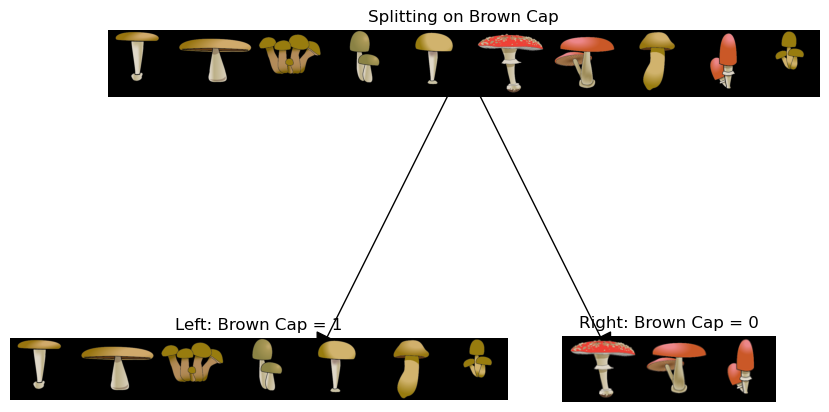

In [186]:
#Visualze the split
from PIL import Image
import networkx as nx
import matplotlib.pyplot as plt
from networkx.drawing.nx_pydot import graphviz_layout

def generate_node_image(node_indices):
    image_paths = ["./decision_tree_images/%d.png" % idx for idx in node_indices]
    images = [Image.open(x) for x in image_paths]
    widths, heights = zip(*(i.size for i in images)) #generator with zip and * to decouple and concatentate all widths and all heights

    total_width = sum(widths)
    max_height = max(heights)
    
    #creating a single image combining all the images
    new_im = Image.new('RGB', (total_width, max_height))

    x_offset = 0
    for im in images:
        new_im.paste(im, (x_offset, 0))
        x_offset += im.size[0] #width
    
    new_im = new_im.resize((int(total_width * len(node_indices) / 10), int(max_height * len(node_indices) / 10)))
    
    return new_im

def generate_split_viz(node_indices, left_indices, right_indices, feature):
    
    G = nx.DiGraph() #Base class for directed graphs. A DiGraph stores nodes and edges with optional data, or attributes.
    
    indices_list = [node_indices, left_indices, right_indices]
    
    #adding node to the graph and generating images for each node based on indices at each node
    for idx, indices in enumerate(indices_list):
        node_name = str(idx)  # Convert integer index to string
        G.add_node(node_name, image=generate_node_image(indices))
    
    #add edges from node 0 to 1 , from node 0 to 2
    G.add_edge('0', '1')
    G.add_edge('0', '2')
    
    #graphviz_layout is used to compute the positions of the nodes in the graph for visualization 
    #Create node positions for G using Graphviz's layout.
    #It uses Graphviz layout engine ("dot") to determine the positions
    pos = graphviz_layout(G, prog="dot")
#     print(G)
#     print(G.nodes)
    print(G.edges)
    print(pos)
    
    #Draw the graph as a simple representation with no node labels or edge labels and using the full Matplotlib figure area and no axis labels by default
    #The network edges are drawn on the subplot using nx.draw_networkx_edges function, where G is the graph, pos is the positions of the nodes, ax is the subplot, and other optional arguments such as arrows and arrowsize are used to customize the appearance of the edges.
    fig = plt.figure()
    ax = plt.subplot(111) #rows, columns, position of it
    ax.set_aspect('equal')
    nx.draw_networkx_edges(G, pos, ax=ax, arrows=True, arrowsize=40)
    #pos : A dictionary with nodes as keys and node positions as values. 
    #ax: Draw the graph in specified Matplotlib axes
    
    #sets up transformations (trans and trans2) to convert coordinates between data space and figure space.
    trans = ax.transData.transform
    trans2 = fig.transFigure.inverted().transform

    feature_name = ["Brown Cap", "Tapering Stalk Shape", "Solitary"][feature]
    #ax_name is a list containing titles for the three subplot axes, corresponding to the root node, left child node, and right child node.
    ax_name = ["Splitting on %s" % feature_name , "Left: %s = 1" % feature_name, "Right: %s = 0" % feature_name]
    for idx, node in enumerate(G):
        print(f"node %s" %node)
        xx, yy = trans(pos[node]) # figure coordinates
        xa, ya = trans2((xx, yy)) # axes coordinates
        piesize = len(indices_list[idx]) / 9
        p2 = piesize / 2.0
        a = plt.axes([xa-p2, ya-p2, piesize, piesize])
        a.imshow(G.nodes[node]['image'])
        a.set_aspect('equal')
        a.set_title(ax_name[idx])
        a.axis('off')
    ax.axis('off')
    plt.show()
    
# Visualize the split 
generate_split_viz(root_node_indices, left_indices, right_indices, feature_idx)

#### Some notes on   trans = ax.transData.transform and trans2 = fig.transFigure.inverted().transform
    In the provided code, the transformations trans and trans2 are used to convert coordinates between two different coordinate systems: data space and figure space.

    Data Space: Data space refers to the coordinate system where the positions of the nodes in the graph G are defined. These positions are determined by the layout algorithm (in this case, the graphviz_layout function) and are typically specified in terms of data units (e.g., x and y coordinates representing the positions of nodes).

    Figure Space: Figure space, on the other hand, is the coordinate system used by the Matplotlib figure to define the positions and sizes of subplots, axes, and other elements within the figure. The figure space coordinates range from 0 to 1, where (0, 0) represents the bottom-left corner of the figure, and (1, 1) represents the top-right corner.

    The purpose of the transformations is to map the positions of nodes in data space (obtained from the graph layout) to positions in figure space (used for drawing the nodes and edges on the plot). This ensures that the graph is properly positioned within the figure and that the node images are displayed in the correct locations.

    Here's a breakdown of the transformations:

    trans=ax.transData.transform: This transformation is used to convert data space coordinates to figure space coordinates. It takes the x and y coordinates of a node in data space (obtained from pos[node]) and returns the corresponding x and y coordinates in figure space. The result is stored in variables xx and yy.

    trans2=fig.transFigure.inverted().transform: This transformation is used to convert figure space coordinates back to data space coordinates. It takes the figure space coordinates (in xx and yy) and converts them back to data space. The result is stored in variables xa and ya, which represent the positions of nodes in figure space relative to the figure size.

    By using these transformations, the code can accurately position the nodes and their images on the Matplotlib subplot, ensuring that the graph visualization is properly scaled and displayed within the figure. It allows the graph to be drawn with the correct proportions, regardless of the figure size or aspect ratio, providing a more accurate and visually appealing representation.
    
    Inside for loop,
                        piesize = len(indices_list[idx]) / 9
    indices_list is a list that contains three lists: node_indices, left_indices, and right_indices.
    Inside the for loop, the current list of indices is accessed using indices_list[idx]. The idx variable is the loop index.
    len(indices_list[idx]) calculates the number of elements in the current list, which represents the number of nodes in the corresponding part of the decision tree.

                        piesize = len(indices_list[idx]) / 9 
        
    calculates a fraction of the total size for the node images. Here, 9 is used as a scaling factor to determine the size of the node images relative to the total size.

                            p2 = piesize / 2.0
    
    p2 is calculated as half of piesize. This is used to determine the offset from the center of the node images when placing them on the subplot.

                        a = plt.axes([xa-p2, ya-p2, piesize, piesize])
    
    plt.axes is used to create a new subplot (a) with the specified position and size for the node image.
    The position of the subplot is specified as [xa-p2, ya-p2], which determines the bottom-left corner of the subplot. This is calculated by subtracting p2 from the x and y coordinates in figure space (xa and ya, respectively).
    The size of the subplot is specified as piesize in both width and height. This means the subplot will be a square with sides of length piesize.
    
    In summary, this code calculates the size (piesize) for displaying the node images based on the number of nodes in the corresponding part of the decision tree. It then uses p2 to offset the center of the node images to position them correctly on the subplot. The subplots are created using plt.axes, and the node images are displayed in each subplot, forming the split visualization for the decision tree. The use of piesize and p2 ensures that the node images are appropriately sized and positioned within the subplot, creating an informative and visually appealing visualization.

In [71]:
# Case 2
root_indices_subset = [0, 2, 4, 6, 8]
feature_idx = 1
left_indices, right_indices = split_dataset(X_train, root_indices_subset, feature_idx)

print("CASE 2:")
print("Left indices: ", left_indices)
print("Right indices: ", right_indices)

CASE 2:
Left indices:  [0, 4, 8]
Right indices:  [2, 6]


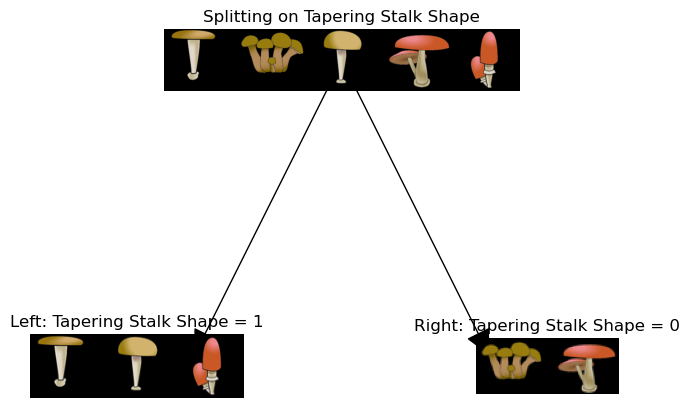

In [72]:
#visualize the split
generate_split_viz(node_indices=root_indices_subset, left_indices=left_indices, right_indices=right_indices, feature=feature_idx)

### 4.3 Calculate information gain
    Next, you'll write a function called information_gain that takes in the training data, the indices at a node and a feature to split on and returns the information gain from the split.
    
    Information gain is nothing but reduction in entropy from the node to the splits


#### Exercise 3
    Please complete the compute_information_gain() function shown below to compute
             Information gain = H(p1_node) - (w_left * H(p1_left) + w_right * H(p1_right))

    where
        H(p1_node) is entropy at the node 
        H(p1_left)  and H(p1_right) are the entropies at the left and the right branches resulting from the split 
        w_left and w_right are the proportion of examples at the left and right branch, respectively

    Note: You can use the compute_entropy() function that you implemented above to calculate the entropy

In [78]:
def compute_information_gain(X, y, node_indices, feature):
    
    """
    Compute the information of splitting the node on a given feature
    
    Args:
        X (ndarray):            Data matrix of shape(n_samples, n_features)
        y (array like):         list or ndarray with n_samples containing the target variable
        node_indices (ndarray): List containing the active indices. I.e, the samples being considered in this step.
   
    Returns:
        info_gain (float):        COmpute cost i.e information gain computed
    
    """ 
    info_gain = 0.0
    left_indices, right_indices = split_dataset(X, node_indices, feature)
    H_left = compute_entropy(y[left_indices]) #sending the y values of left split examples and calculating entropy
    w_left = len(left_indices) / len(y[node_indices])
   
    H_right = compute_entropy(y[right_indices]) #sending the y values of left split examples and calculating entropy
    w_right = len(right_indices) / len(y[node_indices])
    
    H_node = compute_entropy(y[node_indices])
    weighted_entropy = (w_left* H_left) + (w_right * H_right)
    info_gain = H_node - weighted_entropy
    return info_gain

In [80]:
root_node_indices = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

info_gain0 = compute_information_gain(X_train, y_train, root_node_indices, feature=0)
print("Information Gain from splitting the root on brown cap: ", info_gain0)

info_gain1 = compute_information_gain(X_train, y_train, root_node_indices, feature=1)
print("Information Gain from splitting the root on tapering stalk shape: ", info_gain1)

info_gain2 = compute_information_gain(X_train, y_train, root_node_indices, feature=2)
print("Information Gain from splitting the root on solitary: ", info_gain2)

Information Gain from splitting the root on brown cap:  0.034851554559677034
Information Gain from splitting the root on tapering stalk shape:  0.12451124978365313
Information Gain from splitting the root on solitary:  0.2780719051126377


    Splitting on "Solitary" (feature = 2) at the root node gives the maximum information gain. Therefore, it's the best feature to split on at the root node.
    
#### 4.4 Get best split
    Now let's write a function to get the best feature to split on by computing the information gain from each feature as we did above and returning the feature that gives the maximum information gain


#### Exercise 4
    Please complete the get_best_split() function shown below.

    The function takes in the training data, along with the indices of datapoint at that node
    The output of the function is the feature that gives the maximum information gain
    You can use the compute_information_gain() function to iterate through the features and calculate the information for each feature
    

In [82]:
def get_best_split(X_train, y_train, node_indices):
    """
    Returns the optimal feature and threshold value
    to split the node data 
    
    Args:
        X (ndarray):            Data matrix of shape(n_samples, n_features)
        y (array like):         list or ndarray with n_samples containing the target variable
        node_indices (ndarray): List containing the active indices. I.e, the samples being considered in this step.

    Returns:
        best_feature (int):     The index of the best feature to split
    """  
    best_feature = -1
    max_info_gain = 0
    total_features = X_train.shape[1]
    for i in range(total_features):
        info_gain = compute_information_gain(X_train, y_train, node_indices, feature=i)
        if info_gain > max_info_gain:
            max_info_gain = info_gain
            best_feature = i
    return best_feature

In [83]:
#checking
best_feature = get_best_split(X_train, y_train, root_indices)
print("Best feature to split on: %d" % best_feature)

#As we saw above, the function returns that the best feature to split on at the root node is feature 2 ("Solitary")

Best feature to split on: 2


### 5 - Building the tree
    In this section, we use the functions you implemented above to generate a decision tree by successively picking the best feature to split on until we reach the stopping criteria (maximum depth is 2).

In [118]:
def build_tree_recursive(X, y, node_indices, branch_name, max_depth, current_depth):
    """
    Build a tree using the recursive algorithm that split the dataset into 2 subgroups at each node.
    This function just prints the tree.
    
    Args:
        X (ndarray):            Data matrix of shape(n_samples, n_features)
        y (array like):         list or ndarray with n_samples containing the target variable
        node_indices (ndarray): List containing the active indices. I.e, the samples being considered in this step.
        branch_name (string):   Name of the branch. ['Root', 'Left', 'Right']
        max_depth (int):        Max depth of the resulting tree. 
        current_depth (int):    Current depth. Parameter used during recursive call.
   
    """ 

    # Maximum depth reached - stop splitting
    if current_depth == max_depth:
        formatting = " " * current_depth + "-" * current_depth
        print(formatting, "%s leaf node with indices" % branch_name, node_indices)
        return
   
    # Otherwise, get best split and split the data
    # Get the best feature and threshold at this node
    best_feature = get_best_split(X, y, node_indices) 
    
    formatting = "-" * current_depth
    print("%s Depth %d, %s: Split on feature: %d" % (formatting, current_depth, branch_name, best_feature))
    
    # Split the dataset at the best feature
    left_indices, right_indices = split_dataset(X, node_indices, best_feature)
    tree.append((left_indices, right_indices, best_feature))
    
    # continue splitting the left and the right child. Increment current depth
    build_tree_recursive(X, y, left_indices, "Left", max_depth, current_depth+1)
    build_tree_recursive(X, y, right_indices, "Right", max_depth, current_depth+1)
    
tree = []
root_indices = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
build_tree_recursive(X_train, y_train, root_indices, "Root", max_depth=2, current_depth=0)

 Depth 0, Root: Split on feature: 2
- Depth 1, Left: Split on feature: 0
  -- Left leaf node with indices [0, 1, 4, 7]
  -- Right leaf node with indices [5]
- Depth 1, Right: Split on feature: 1
  -- Left leaf node with indices [8]
  -- Right leaf node with indices [2, 3, 6, 9]


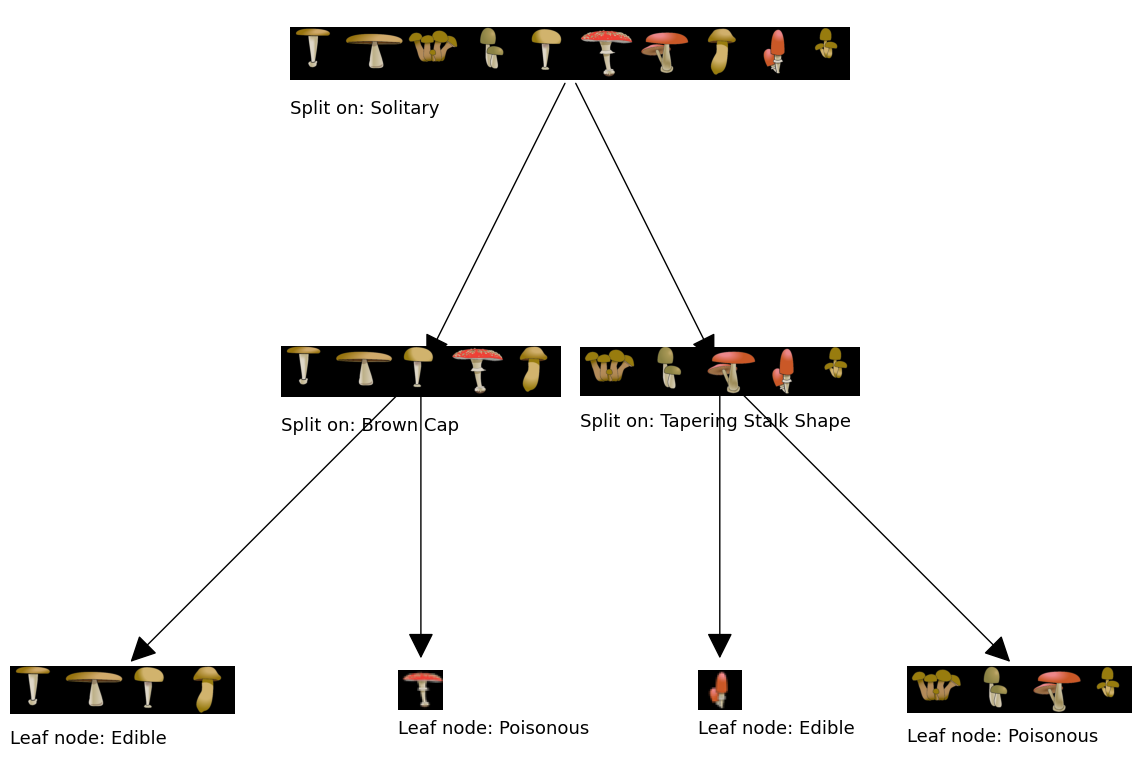

In [207]:
#visualize tree
def generate_tree_viz(root_indices, y, tree):
    
    G = nx.DiGraph()
 
    G.add_node('0', image=generate_node_image(root_indices)) #generating root node
    idx = 1
    root = 0
    
    num_images = [len(root_indices)]
    
    feature_name = ["Brown Cap", "Tapering Stalk Shape", "Solitary"]
    y_name = ["Poisonous","Edible"]
    
    decision_names = []
    leaf_names = []
    
    #tree = [([0, 1, 4, 5, 7], [2, 3, 6, 8, 9], 2), ([0, 1, 4, 7], [5], 0), ([8], [2, 3, 6, 9], 1)]
    for i, level in enumerate(tree):
        indices_list = level[:2] #getting left indices and right indices
        #[([0, 1, 4, 5, 7], [2, 3, 6, 8, 9]), 
        #([0, 1, 4, 7], [5]), 
        #([8], [2, 3, 6, 9])]
        for indices in indices_list: 
            G.add_node(str(idx), image= generate_node_image(indices)) #this is where left and right nodes for each node is added
            G.add_edge(str(root), str(idx)) #egdest 1st - (0, 1) 2- (0, 2) 3- (1, 3), 4-(1, 4), 5- (2, 5), 6- (2, 6)
            
            # For visualization
            num_images.append(len(indices))
            idx += 1
            if i > 0:
                leaf_names.append("Leaf node: %s" % y_name[max(y[indices])]) #indicates depth 2
            
        decision_names.append("Split on: %s" % feature_name[level[2]])
        root += 1
        
    node_names = decision_names + leaf_names
#     print(node_names) #['Split on: Solitary', 'Split on: Brown Cap', 'Split on: Tapering Stalk Shape', 'Leaf node: Edible', 'Leaf node: Poisonous', 'Leaf node: Edible', 'Leaf node: Poisonous']
    pos = graphviz_layout(G, prog="dot")

    fig = plt.figure(figsize=(14, 10))
    ax = plt.subplot(111)
    ax.set_aspect('equal')
    nx.draw_networkx_edges(G, pos, ax=ax, arrows=True, arrowsize=40)
    
    trans = ax.transData.transform #ax.transData.transform represents the transformation from data coordinates (e.g., x and y values) to display (screen) coordinates.
    trans2 = fig.transFigure.inverted().transform #ax.transFigure represents the transformation from figure coordinates (ranging from 0 to 1) to display (screen) coordinates.
    #inverted() is a method that obtains the inverse of the transformation, i.e., the transformation from display coordinates to figure coordinates.
    #transFigure.inverted().transform is a method that takes a set of points in display coordinates and converts them to figure coordinates (ranging from 0 to 1).
    

    for idx, n in enumerate(G):
        xx, yy = trans(pos[n]) # figure coordinates
        xa, ya = trans2((xx, yy)) # axes coordinates
        piesize = num_images[idx] / 25
        p2 = piesize / 2.0
        a = plt.axes([xa-p2, ya-p2, piesize, piesize])
        a.set_aspect('equal')
        a.imshow(G.nodes[n]['image'])
        a.axis('off')
        a.set_title(node_names[idx], y=-0.8, fontsize=13, loc="left")
    ax.axis('off')
    plt.show()

generate_tree_viz(root_indices, y_train, tree)

In [208]:
def calculate_entropy(y):
    #entropy = -p1 log p1 - p2 log p2
    entropy = 0.0
    p1 = len(np.where(y==1)[0]) / len(y)
    p2 = 1 - p1
    if p1 not in [0, 1]:
        entropy = -(p1 * np.log2(p1)) - (p2 * np.log2(p2))
    return entropy

def calculate_info_gain(X, y, node_indices, left_indices, right_indices):
    info_gain = 0.0
    #infogain = H(node_indices) - (wleft Hleft + wright Hright)
    H_node = calculate_entropy(y[node_indices])
    H_left = calculate_entropy(y[left_indices])
    H_right = calculate_entropy(y[right_indices])
    w_left = len(left_indices) / len(node_indices)
    w_right = len(right_indices) / len(node_indices)
    info_gain = H_node - ((w_left * H_left) + (w_right * H_right))
    return info_gain

def split_data(X, node_indices, feature):
    left_indices = []
    right_indices = []
    for i in node_indices:
        if X[i, feature] == 1:
            left_indices.append(i)
        else:
            right_indices.append(i)
    return left_indices, right_indices
    

def get_best_split(X, y, node_indices):
    #we have to split with each feature and calculate the information gain and get the feature index where it is higher
    #loop through each feature and split the examples
    max_info_gain = 0.0
    best_feature = -1
    
    for i in range(X.shape[1]):
        left_indices, right_indices = split_data(X, node_indices, i)
        if len(left_indices) > 0 and len(right_indices) > 0: #to avoid zero by division error
            info_gain = calculate_info_gain(X, y, node_indices, left_indices, right_indices)
        
            if info_gain > max_info_gain:
                max_info_gain = info_gain
                best_feature = i
                left_indices_ = left_indices
                right_indices_ = right_indices

    return best_feature, left_indices_, right_indices_
        
    
def build_tree(X, y, node_indices, node_name, max_depth, current_depth):
    if current_depth == max_depth:
        formatting = " " * current_depth + "-" * current_depth
        print(formatting, "%s leaf node with indices " % node_name, node_indices)
        return
    
    #get the best feature to split on at this node
    best_feature, left_indices, right_indices = get_best_split(X, y, node_indices)
    
    #build tree in the console
    formatting = "-" * current_depth
    print("%s Depth %d,  %s: Split on feature %d," %(formatting, current_depth, node_name, best_feature))
    tree.append((left_indices, right_indices, best_feature))
#     print(tree)
    #call the same function recursively for further splits at each left and right splits
    build_tree(X, y, left_indices, "Left", max_depth, current_depth+1) #this is where recursion happens first depth 1 left, left lef, right leaf
    build_tree(X, y, right_indices, "Right", max_depth, current_depth+1)
    
    
    
root_indices = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
tree = []
build_tree(X_train, y_train, root_indices, "Root", max_depth=2, current_depth=0)

 Depth 0,  Root: Split on feature 2,
- Depth 1,  Left: Split on feature 0,
  -- Left leaf node with indices  [0, 1, 4, 7]
  -- Right leaf node with indices  [5]
- Depth 1,  Right: Split on feature 1,
  -- Left leaf node with indices  [8]
  -- Right leaf node with indices  [2, 3, 6, 9]


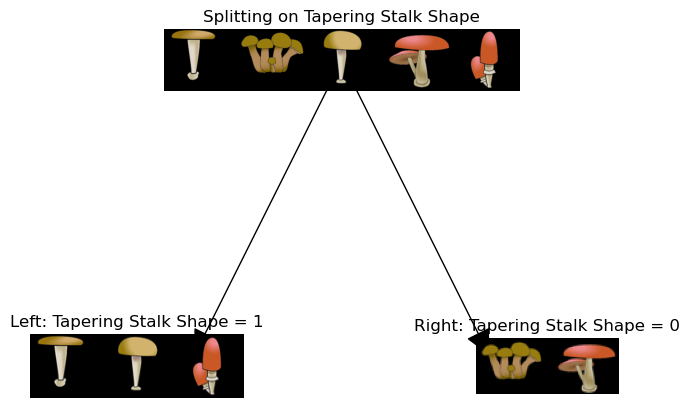

In [210]:
#Generate split visualization
import networkx as nx
import matplotlib.pyplot as plt
from networkx.drawing.nx_pydot import graphviz_layout
from PIL import Image

def generate_image(node_indices):
    image_paths = ["./decision_tree_images/%d.png"%idx for idx in node_indices]
    images = [Image.open(img) for img in image_paths]
    widths, heights = zip(*(i.size for i in images))
    total_width = sum(widths)
    max_height = max(heights)
    
    new_im = Image.new("RGB", (total_width, max_height))
    
    X_offset = 0
    for img in images:
        new_im.paste(img, (X_offset, 0))
        X_offset += img.size[0]
    new_im = new_im.resize((int(total_width * len(node_indices) / 10), int(max_height * len(node_indices) / 10)))
    return new_im
    
def generate_split_viz(node_indices, left_indices, right_indices, feature_idx):
    G = nx.DiGraph()
    indices_list = [node_indices, left_indices, right_indices]
    
    for idx, indices in enumerate(indices_list):
        node_name = str(idx)
        G.add_node(node_name, image=generate_image(indices))
    G.add_edge('0', '1')
    G.add_edge('0', '2')
    
    #positions
    pos = graphviz_layout(G, prog="dot")
    
    #matplotlib figure
    fig = plt.figure()
    ax = fig.add_subplot(111)
    nx.draw_networkx_edges(G, pos=pos, ax=ax, arrows=True, arrowsize=40)
    
    
    #transformations 
    trans = ax.transData.transform
    trans2 = fig.transFigure.inverted().transform
    feature_name = ["Brown Cap", "Tapering Stalk Shape", "Solitary"][feature_idx]
    ax_name = [f"Splitting on {feature_name}", f"Left: {feature_name} = 1", f"Right: {feature_name} = 0"]
    for idx, node in enumerate(G):
        xx, yy = trans(pos[node]) #get the node position data
        xa, ya = trans2((xx, yy)) #transform it into figure data
        piesize = len(indices_list[idx]) / 9
        p = piesize / 2
        a = plt.axes([xa-p, ya-p, piesize, piesize])
        a.imshow(G.nodes[node]['image'])
        a.axis("off")
        a.set_aspect("equal")
        a.set_title(ax_name[idx])
    ax.set_aspect("equal")
    ax.axis("off")
    plt.show()

left_indices = [0, 4, 8]
right_indices =  [2, 6]
node_indices = [0, 2, 4, 6, 8]
feature_idx = 1
generate_split_viz(node_indices, left_indices, right_indices, feature_idx)

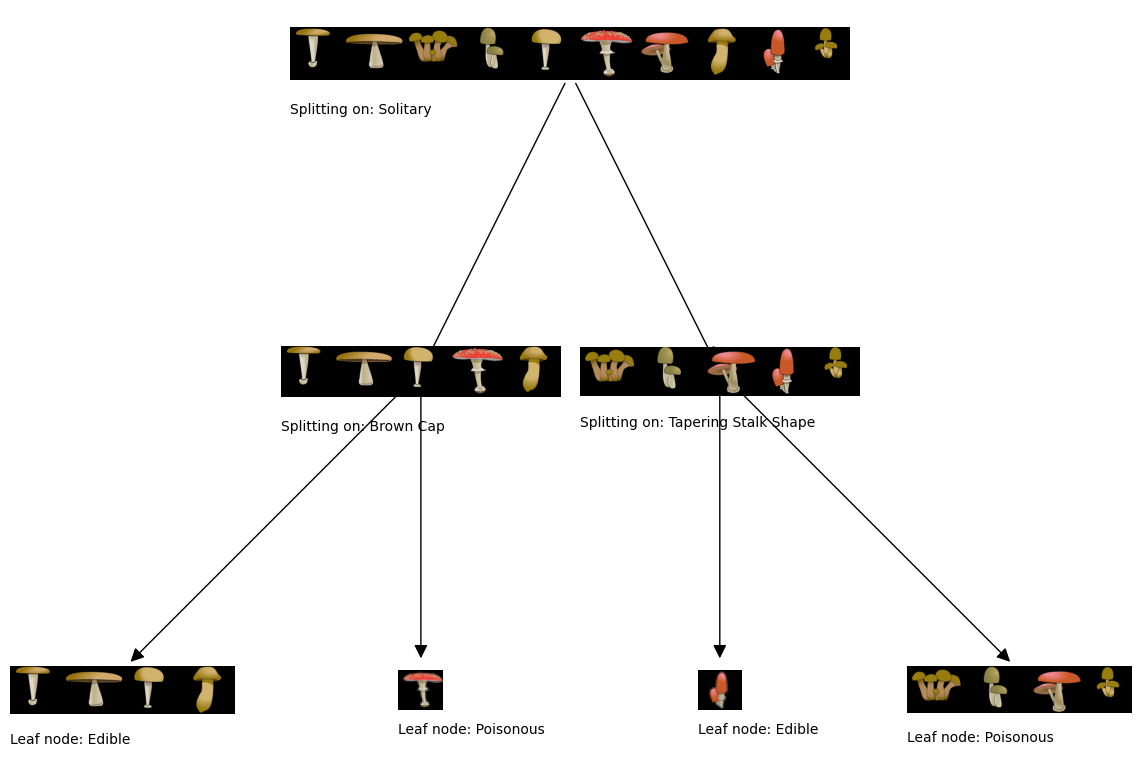

In [234]:
#tree visualization
import networkx as nx
import matplotlib.pyplot as plt
from networkx.drawing.nx_pydot import graphviz_layout

def generate_tree_viz(root_indices, tree, y):
    G = nx.DiGraph()
    
    feature_names = ["Brown Cap", "Tapering Stalk Shape", "Solitary"]
    y_labels = ["Poisonous", "Edible"]
    idx = 1
    root = 0
    G.add_node(str(root), image=generate_image(root_indices))
    num_images = [len(root_indices)]
    decision_names = []
    leaf_names = []
    
    for i, level in enumerate(tree):
        level_indices = level[:2]
        for indices in level_indices:
            G.add_node(str(idx), image=generate_image(indices))
            G.add_edge(str(root), str(idx))
            
            num_images.append(len(indices))
            idx += 1
            if i > 0:
                leaf_names.append(f"Leaf node: {y_labels[max(y[indices])]}")
        decision_names.append(f"Splitting on: {feature_names[level[2]]}")
        root += 1
    node_names = decision_names + leaf_names
    pos = graphviz_layout(G, prog="dot")
    
    fig = plt.figure(figsize=(14, 10))
    ax = fig.add_subplot(111)
    nx.draw_networkx_edges(G, pos=pos, ax=ax, arrows=True, arrowsize=20)
    
    trans = ax.transData.transform
    trans2 = fig.transFigure.inverted().transform
    for i, node in enumerate(G):
        xx, yy = trans(pos[node])
        xa, ya = trans2((xx, yy))
        piesize = num_images[i] / 25 #getting the position to be occupies for each indices image scaled to total images
        p = piesize / 2 #dividing by 2 as each node will have 2 splits
        a = plt.axes([xa-p, ya-p, piesize, piesize]) #positionleft, positionright, width, height
        a.imshow(G.nodes[node]['image'])
        a.set_title(node_names[i], y=-0.8, fontsize=10, loc="left")
        a.set_aspect("equal")
        a.axis("off")
    ax.axis("off")
    ax.set_aspect("equal")
    ax.axis("off")
    plt.show()
        
root_indices = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
#for tree run the above 2nd cell from here
generate_tree_viz(root_indices, tree, y_train)

In [235]:
#UNIT TESTS
import numpy as np

def compute_entropy_test(target):
    y = np.array([1] * 10)
    result = target(y)
    
    assert result == 0, "Entropy must be 0 with array of ones"
    
    y = np.array([0] * 10)
    result = target(y)
    
    assert result == 0, "Entropy must be 0 with array of zeros"
    
    y = np.array([0] * 12 + [1] * 12)
    result = target(y)
    
    assert result == 1, "Entropy must be 1 with same ammount of ones and zeros"
    
    y = np.array([1, 0, 1, 0, 1, 1, 1, 0, 1])
    assert np.isclose(target(y), 0.918295, atol=1e-6), "Wrong value. Something between 0 and 1"
    assert np.isclose(target(-y + 1), target(y), atol=1e-6), "Wrong value"
    
    print("\033[92m All tests passed. ")

def split_dataset_test(target):

    # Case 1
    X = np.array([[1, 0], 
         [1, 0], 
         [1, 1], 
         [0, 0], 
         [0, 1]])
    X_t = np.array([[0, 1, 0, 1, 0]])
    X = np.concatenate((X, X_t.T), axis=1)

    left, right = target(X, list(range(5)), 2)
    expected = {'left': np.array([1, 3]),
                'right': np.array([0, 2, 4])}

    assert type(left) == list, f"Wrong type for left. Expected: list got: {type(left)}"
    assert type(right) == list, f"Wrong type for right. Expected: list got: {type(right)}"
    
    assert type(left[0]) == int, f"Wrong type for elements in the left list. Expected: int got: {type(left[0])}"
    assert type(right[0]) == int, f"Wrong type for elements in the right list. Expected: number got: {type(right[0])}"
    
    assert len(left) == 2, f"left must have 2 elements but got: {len(left)}"
    assert len(right) == 3, f"right must have 3 elements but got: {len(right)}"

    assert np.allclose(right, expected['right']), f"Wrong value for right. Expected: { expected['right']} \ngot: {right}"
    assert np.allclose(left, expected['left']), f"Wrong value for left. Expected: { expected['left']} \ngot: {left}"


    # Case 2
    X = np.array([[0, 1], 
         [1, 1], 
         [1, 1], 
         [0, 0], 
         [1, 0]])
    X_t = np.array([[0, 1, 0, 1, 0]])
    X = np.concatenate((X_t.T, X), axis=1)

    left, right = target(X, list(range(5)), 0)
    expected = {'left': np.array([1, 3]),
                'right': np.array([0, 2, 4])}


    assert len(left) == 2, f"left must have 2 elements but got: {len(left)}" 
    assert len(right) == 3, f"right must have 3 elements but got: {len(right)}"
    assert np.allclose(right, expected['right']) and np.allclose(left, expected['left']), f"Wrong value when target is at index 0."


    # Case 3
    X = (np.random.rand(11, 3) > 0.5) * 1 # Just random binary numbers
    X_t = np.array([[0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0]])
    X = np.concatenate((X, X_t.T), axis=1)

    left, right = target(X, [1, 2, 3, 6, 7, 9, 10], 3)
    expected = {'left': np.array([1, 3, 6]),
                'right': np.array([2, 7, 9, 10])}

    assert np.allclose(right, expected['right']) and np.allclose(left, expected['left']), f"Wrong value when target is at index 0. \nExpected: {expected} \ngot: \{left:{left}, 'right': {right}\}"
 
    
    print("\033[92m All tests passed.")

def compute_information_gain_test(target):
    X = np.array([[1, 0], 
         [1, 0], 
         [1, 0], 
         [0, 0], 
         [0, 1]])
    
    y = np.array([[0, 0, 0, 0, 0]]).T
    node_indexes = list(range(5))

    result1 = target(X, y, node_indexes, 0)
    result2 = target(X, y, node_indexes, 0)
    
    assert result1 == 0 and result2 == 0, f"Information gain must be 0 when target variable is pure. Got {result1} and {result2}"
    
    y = np.array([[0, 1, 0, 1, 0]]).T
    node_indexes = list(range(5))
    
    result = target(X, y, node_indexes, 0)
    assert np.isclose(result, 0.019973, atol=1e-6), f"Wrong information gain. Expected {0.019973} got: {result}"
    
    result = target(X, y, node_indexes, 1)
    assert np.isclose(result, 0.170951, atol=1e-6), f"Wrong information gain. Expected {0.170951} got: {result}"

    node_indexes = list(range(4))
    result = target(X, y, node_indexes, 0)
    assert np.isclose(result, 0.311278, atol=1e-6), f"Wrong information gain. Expected {0.311278} got: {result}"

    result = target(X, y, node_indexes, 1)
    assert np.isclose(result, 0, atol=1e-6), f"Wrong information gain. Expected {0.0} got: {result}"

    print("\033[92m All tests passed.")

def get_best_split_test(target):
    X = np.array([[1, 0], 
         [1, 0], 
         [1, 0], 
         [0, 0], 
         [0, 1]])

    y = np.array([[0, 0, 0, 0, 0]]).T
    node_indexes = list(range(5))

    result = target(X, y, node_indexes)
    
    assert result == -1, f"When the target variable is pure, there is no best split to do. Expected -1, got {result}"
    
    y = X[:,0]
    result = target(X, y, node_indexes)
    assert result == 0, f"If the target is fully correlated with other feature, that feature must be the best split. Expected 0, got {result}"
    y = X[:,1]
    result = target(X, y, node_indexes)
    assert result == 1, f"If the target is fully correlated with other feature, that feature must be the best split. Expected 1, got {result}"

    y = 1 - X[:,0]
    result = target(X, y, node_indexes)
    assert result == 0, f"If the target is fully correlated with other feature, that feature must be the best split. Expected 0, got {result}"

    y = np.array([[0, 1, 0, 1, 0]]).T
    result = target(X, y, node_indexes)
    assert result == 1, f"Wrong result. Expected 1, got {result}"

    y = np.array([[0, 1, 0, 1, 0]]).T    
    node_indexes = [2, 3, 4]
    result = target(X, y, node_indexes)
    assert result == 0, f"Wrong result. Expected 0, got {result}"

    n_samples = 100
    X0 = np.array([[1] * n_samples])
    X1 = np.array([[0] * n_samples])
    X2 = (np.random.rand(1, 100) > 0.5) * 1
    X3 = np.array([[1] * int(n_samples / 2) + [0] * int(n_samples / 2)])
    
    y = X2.T
    node_indexes = list(range(20, 80))
    X = np.array([X0, X1, X2, X3]).T.reshape(n_samples, 4)
    result = target(X, y, node_indexes)
    
    assert result == 2, f"Wrong result. Expected 2, got {result}"
    
    y = X0.T
    result = target(X, y, node_indexes)
    assert result == -1, f"When the target variable is pure, there is no best split to do. Expected -1, got {result}"
    print("\033[92m All tests passed.")